# Commencer à construire notre projet

# Introduction

Maintenant que nous avons présenté les API et appris un peu plus sur HTTP et REST, nous allons travailler sur la création d'une application (l'application de partage de recettes connue sous le nom de Smilecook). Dans ce guide, nous visons à lancer le développement réel du projet. Il s'agit d'une plate-forme de partage de recettes sur laquelle les utilisateurs peuvent créer des comptes et partager leurs propres recettes avec d'autres utilisateurs. Comme vous pouvez l'imaginer, il contiendra de nombreux points de terminaison d'API pour nos utilisateurs afin qu'ils puissent gérer leurs recettes. Nous utiliserons le package Flask-RESTful pour développer efficacement notre API RESTful. Ce guide parlera du CRUD (Create, Read, Update, Delete) de ces recettes, ainsi que de la façon de définir le statut de publication de la recette.

## Qu'est-ce que Flask-RESTful ?

Flask-RESTful est une extension Flask qui nous permet de développer rapidement des API RESTful. Par rapport au wrapper intégré, @app.route('/'), dont nous avons parlé dans le guide précédent, Flask-RESTful nous permet de maintenir et de structurer les points de terminaison de l'API d'une manière bien meilleure et plus facile. Dans ce guide, nous développerons notre projet en utilisant cette extension Flask afin que vous voyiez comment nous pouvons structurer nos points de terminaison.

## Utilisation de Flask-RESTful 

pour développer notre plate-forme de partage de recettes, "Smilecook" Dans ce guide, nous allons développer une plate-forme de partage de recettes appelée Smilecook. À partir de ce guide , nous allons commencer à lui ajouter des fonctions. Nous pensons que cette approche vous aidera à découvrir les concepts clés et les compétences dont vous aurez besoin pour développer cette application et l'aider à atteindre son plein potentiel, tout en vous aidant à comprendre l'ensemble du flux de travail de développement. construira les fonctions CRUD de base des recettes. 

Le package Flask-RESTful nous permet de structurer notre code de manière plus complète. Nous allons définir certaines méthodes dans une ressource et les lier aux points de terminaison. Le flux d'une requête GET, par exemple, sera l'envoi de la requête aux endpoints (http://localhost:5000/recipes), qui seront ensuite gérées par la méthode GET que nous allons implémenter dans le Ressource. Cela entraînera le retour des recettes à nous


Outre les fonctions de base CRUD, nous allons également implémenter les fonctions de publication et de dépubliage sur ces recettes. Cela peut être fait via les méthodes PUT et DELETE, qui peuvent être trouvées dans la classe RecipePublishResource. Nous allons lier ces deux méthodes au endpoint http://localhost: 5000/recettes/1/publier (pour la recette dont l'ID = 1). Pour plus de détails sur la conception de nos terminaux, veuillez vous référer au tableau suivant

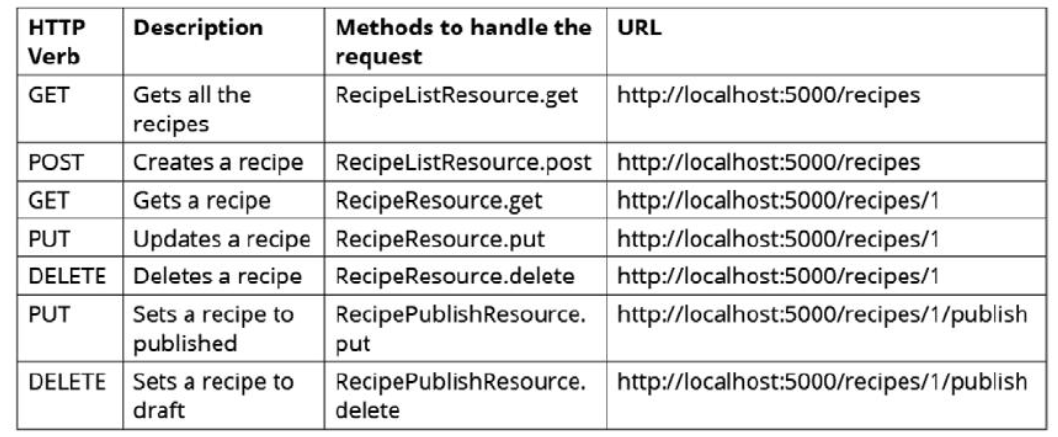

## Exercice 5 : Création d'un projet de développement dans PyCharm

Avant de commencer à développer l'application Python, vous devez créer un projet de développement dans PyCharm. PyCharm gère les choses à l'aide de projets. Dans cet exercice, vous apprendrez à créer un nouveau projet de développement dans PyCharm appelé Smilecook. Vous devrez également installer les packages nécessaires pour ce projet. Commençons :

* 1. Créez le projet et nommez-le smilecook

* 2. Vérifiez la structure du projet et assurez-vous que l'environnement virtuel a été créé. Une fois le module créé, nous pourrons voir la hiérarchie du projet sur le panneau de gauche. Nous pouvons voir le dossier venv sous le dossier du projet, qui a été créé et activé par PyCharm. Maintenant, lorsque nous écrivons du code sous ce projet, il sera exécuté dans l'environnement virtuel

* 3. Installez les packages requis pour ce guide. Pour ce faire, créez un fichier appelé requirements.txt dans notre dossier de projet. Tapez le code suivant pour spécifier les packages que vous souhaitez installer :

    
    Flask==1.0.3
    Flask-RESTful==0.3.7
    httpie==1.0.3

4. Utilisez la commande pip pour installer ces packages. Après cela, dans l'onglet Terminal, en bas de Pycharm, utilisez la commande pip suivante pour installer les packages que nous avons spécifiés dans le fichier requirements.txt:


    pip install -r requirements.txt

## Création d'un modèle de recette

Comme vous pouvez l'imaginer, une recette peut avoir plusieurs attributs. Pour enregistrer chaque détail de ces attributs, nous allons modéliser la recette à l'aide d'une classe. Cette classe de recette va avoir plusieurs attributs essentiels.Voici une brève description des attributs que nous allons définir dans la classe de recette :

* name : Le nom de la recette.
* description : La description de la recette.
* num_of_servings : Le nombre de portions.
* cook_time : Le temps de cuisson requis. Il s'agit d'un entier dont les unités sont en secondes.
* directions : les directions.
* is_publish : l'état de publication de la recette ; la valeur par défaut est draft.

 Dans le prochain exercice, nous allons vous montrer comment coder la classe de recette pour qu'elle ait ces attributs.

## Exercice 6 : Création du modèle de recette 

Dans cet exercice, nous allons coder le modèle de recette, étape par étape. La classe de recette contiendra les attributs dont nous avons discuté précédemment.

 Maintenant, créons la classe de recette:
 
 * 1. Cliquez avec le bouton droit sur le nom du projet, c'est-à-dire Smilecook, et créez un package Python. Nommez-le modeles :

* 2. Ensuite, créez un chier appelé recette.py sous models et tapez le code suivant :

In [ ]:
recipe_list = []


def get_last_id():
    if recipe_list:
        last_recipe = recipe_list[-1]
    else:
        return 1
    return last_recipe.id + 1

Arrêtons-nous un instant et examinons le code ici. Tout d'abord, nous définissons recette_list = [] afin de pouvoir stocker les recettes dans la mémoire de l'application. Ensuite, nous définissons la fonction get_last_id pour obtenir l'ID de notre dernière recette. Plus tard, lorsque nous créerons une nouvelle recette, nous utiliserons cette méthode pour évaluer le dernier ID dans Recipe_list afin que nous puissions trouver un nouvel ID pour la nouvelle recette


* 3. Déﬁnissez la classe de recette à l'aide du code suivant. Tapez le code suivant dans Recipe.py, juste après la fonction get_last_id que nous avons implémentée

In [ ]:
class Recipe:

    def __init__(self, name, description, num_of_servings, cook_time, directions):
        self.id = get_last_id()
        self.name = name
        self.description = description
        self.num_of_servings = num_of_servings
        self.cook_time = cook_time
        self.directions = directions
        self.is_publish = False

La classe Recipe a la méthode constructeur __init__, qui prendra des paramètres tels que le nom, la description, le nombre de portions, l'heure de cuisson et les directions, et créera l'objet de recette en fonction de cela. L'ID est auto-incrémenté et is_publish est défini sur false par défaut. Cela signifie que, par défaut, la recette sera définie sur brouillon (non publiée).

* 4. Dans la même classe Recipe, dénissez la méthode de données pour renvoyer les données en tant qu'objet dictionnaire. Vous vous souviendrez qu'en Python, l'indentation compte. Le code suivant est indenté car il se trouve sous la classe Recipe :

Maintenant que nous avons construit le modèle de recette, nous allons continuer et créer le point de terminaison de l'API à l'aide de Flask-RESTful

In [ ]:
@property
def data(self):
    return {
        'id': self.id,
        'name': self.name,
        'description': self.description,
        'num_of_servings': self.num_of_servings,
        'cook_time': self.cook_time,
        'directions': self.directions
    }

Recipe.data = data

## Routage ingénieux

Les principaux éléments constitutifs de Flask-RESTful sont les ressources. Les ressources sont construites au-dessus de la vue enfichable de Flask. 

Le concept de routage ingénieux est que nous voulons structurer toutes les requêtes des clients autour des ressources. Dans notre plateforme de partage de recettes, nous allons regrouper les actions CRUD sur une recette sous RecipeResource. Pour les actions de publication et de dépublication, nous les regrouperons sous une autre RecipePublishResource. Cela fournit une structure claire que d'autres développeurs peuvent suivre. La manière dont nous pouvons implémenter ces ressources est simple : nous avons juste besoin d'hériter de la classe flask_restful.Resource et d'implémenter les méthodes qui correspondent au verbe HTTP qu'elle contient. exercice, nous définirons trois sous-classes : une pour la collection de recettes, une pour une recette unique et une pour la publication de la recette.

## Exercice 7 : Dénfir un point de terminaison d'API pour le modèle de recette

Pour créer un point de terminaison d'API, nous devons définir une classe qui hérite de flask_restful.Resource. Ensuite, nous pouvons déclarer les méthodes get et post à l'intérieur de la classe. Commençons :

* 1. Créez un dossier appelé resources sous le projet, puis créez un fichier appelé Recipe.py sous le dossier resources.

* 2. Importez les packages, classes et fonctions nécessaires à l'aide du code suivant : 

    
    
    from flask import request
    from flask_restful import Resource
    from http import HTTPStatus
    from models.recipe import Recipe, recipe_list

* 3. Juste après l'importation de code précédente, créez la classe RecipeListResource. Cette classe a des méthodes GET et POST, qui sont respectivement utilisées pour obtenir et créer les ressources de la recette. Nous terminerons d'abord la méthode get :

In [ ]:
#!pip install Flask-RESTful==0.3.7

In [ ]:
from flask import request
from flask_restful import Resource
from http import HTTPStatus

class RecipeListResource(Resource):

    def get(self):
        data = []
        for recipe in recipe_list:
            if recipe.is_publish is True:
                data.append(recipe.data)

        return {'data': data}, HTTPStatus.OK


Ici, nous avons créé et implémenté la classe RecipeListResource, qui hérite de flask-restful.Resource. La méthode get que nous avons implémentée sert à récupérer toutes les recettes publiques. Pour ce faire, il déclare une liste de données et obtient toutes les recettes avec is_publish = true dans Recipe_list. Ces recettes sont ajoutées à notre liste de données et renvoyées aux utilisateurs.

4. Ajoutez la méthode de publication. Ceci est utilisé pour créer la recette:

In [ ]:
def post(self):
        data = request.get_json()

        recipe = Recipe(name=data['name'],
                        description=data['description'],
                        num_of_servings=data['num_of_servings'],
                        cook_time=data['cook_time'],
                        directions=data['directions'])

        recipe_list.append(recipe)

RecipeListResource.post = post

Dans cet exercice, nous avons construit deux méthodes qui gèrent les requêtes client GET et POST. Le tableau suivant résume les méthodes que nous avons construites dans cet exercice :

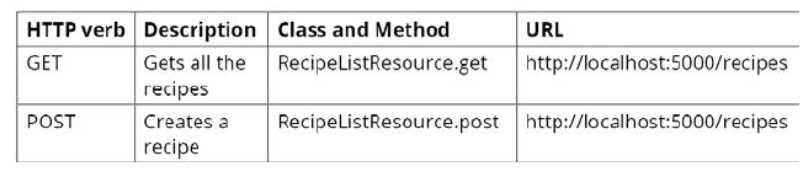

## Exercice 8 : Dénir la ressource de recette 

Dans cet exercice, nous allons définir la ressource de recette. Nous allons utiliser deux méthodes : la méthode get, pour récupérer une seule recette ; et la méthode put, pour mettre à jour la recette. Commençons :

1. Définissez la ressource RecipeResource et implémentez la méthode get à l'aide de l'exemple de code suivant :

In [ ]:
class RecipeResource(Resource):

    def get(self, recipe_id):
        recipe = next((recipe for recipe in recipe_list if recipe.id == recipe_id and recipe.is_publish == True), None)

        if recipe is None:
            return {'message': 'recipe not found'}, HTTPStatus.NOT_FOUND

        return recipe.data, HTTPStatus.OK

De même, RecipeResource hérite également de flask-restful.Resource. La méthode get que nous implémentons ici consiste à récupérer une seule recette. Nous le faisons en recherchant Recipe_id dans Recipe_list. Nous ne récupérerons ces recettes qu'avec is_publish = true. Si aucune recette de ce type n'est trouvée, nous renverrons le message recette non trouvée. Sinon, nous renverrons la recette, avec un statut HTTP de 200 OK.


2. Implémentez la méthode put avec le code suivant :

In [ ]:
def put(self, recipe_id):
      data = request.get_json()

      recipe = next((recipe for recipe in recipe_list if recipe.id == recipe_id), None)

      if recipe is None:
          return {'message': 'recipe not found'}, HTTPStatus.NOT_FOUND

      recipe.name = data['name']
      recipe.description = data['description']
      recipe.num_of_servings = data['num_of_servings']
      recipe.cook_time = data['cook_time']
      recipe.directions = data['directions']

      return recipe.data, HTTPStatus.OK
  
RecipeResource.put = put

La deuxième méthode que nous avons implémentée ici est put. Il obtient les détails de la recette à partir de la demande du client à l'aide de request.get_json et met à jour l'objet de la recette. Ensuite, il renvoie le code d'état HTTP 200 OK si tout se passe bien.

Ici, nous avons construit deux méthodes pour les ressources de recette. Les méthodes GET et PUT sont utilisées pour traiter la requête client correspondante. Le tableau suivant montre les méthodes que nous avons créées pour la classe RecipeResource dans cet exercice :

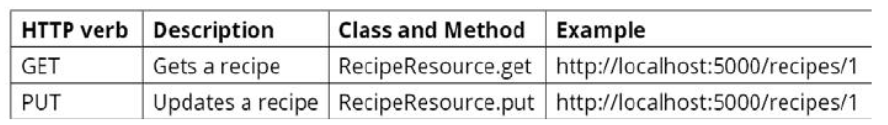

## Exercice 9 : Publier et dépublier les recettes 

Dans les exercices précédents, nous avons créé les ressources de recette et leurs méthodes associées. Désormais, notre application Smilecook peut lire/écrire des actions sur des recettes. Cependant, au début de ce guide, nous avons dit que les recettes peuvent avoir deux Statuts (non publié et publié). Cela permet à l'utilisateur de continuer à mettre à jour ses recettes non publiées avant de les publier dans le monde. Dans cet exercice, nous allons définir la ressource pour publier et dépublier une recette. Commençons:

1. Déﬁnissez la ressource RecipePublic et implémentez la méthode put qui gérera la requête HTTP PUT :

In [ ]:
class RecipePublishResource(Resource):

    def put(self, recipe_id):
        recipe = next((recipe for recipe in recipe_list if recipe.id == recipe_id), None)

        if recipe is None:
            return {'message': 'recipe not found'}, HTTPStatus.NOT_FOUND

        recipe.is_publish = True

        return {}, HTTPStatus.NO_CONTENT

RecipePublishResource hérite de flask_restful.Resource. La méthode put localisera la recette avec la recette_id transmise et mettra à jour le statut is_publish à true. Ensuite, il renverra HTTPStatus.NO_CONTENT, ce qui nous montre que la recette a été publiée avec succès


2. Implémentez la méthode delete, qui gérera la requête HTTP DELETE :

In [ ]:
def delete(self, recipe_id):
      recipe = next((recipe for recipe in recipe_list if recipe.id == recipe_id), None)

      if recipe is None:
          return {'message': 'recipe not found'}, HTTPStatus.NOT_FOUND

      recipe.is_publish = False

      return {}, HTTPStatus.NO_CONTENT

RecipePublishResource.delete = delete

La méthode delete est l'opposé de la méthode put. Au lieu de définir is_publish sur true, il le définit sur false afin de dépublier la recette. Vous pouvez également voir que nous utilisons ces méthodes de manière flexible ; la méthode put n'est pas nécessairement pour la mise à jour, et la méthode delete n'est pas nécessairement pour la suppression

## Configuration des points de terminaison 

Maintenant que nous avons défini toutes nos ressources, nous allons configurer certains points de terminaison afin que les utilisateurs puissent leur envoyer des requêtes. Ces terminaux sont accessibles aux utilisateurs et sont connectés à des ressources spéciques. Nous utiliserons la méthode add_resource sur l'objet API pour spécifier l'URL de ces points de terminaison et acheminer la requête HTTP du client vers nos ressources. 

Par exemple, la syntaxe api.add_resource(RecipeListResource, '/recipes') est utilisée pour lier la route (chemin URL relatif) à RecipeListResource afin que les requêtes HTTP soient dirigées vers cette ressource. Selon le verbe HTTP (par exemple, GET et POST), la demande sera gérée par les méthodes correspondantes dans la ressource en conséquence.

## Exercice 10 : Création du fichier d'application principal 

Dans cet exercice, nous allons créer notre fichier app.py, qui sera notre fichier d'application principal. Nous allons configurer Flask et y initialiser notre flask_restful.API. Enfin, nous allons configurer les points de terminaison afin que les utilisateurs puissent envoyer des demandes à nos services backend. Commençons :

1. Créez le fichier app.py sous le dossier du projet.

2. Importez les classes nécessaires à l'aide du code suivant :

In [ ]:
from flask import Flask
from flask_restful import Api

#from resources.recipe import RecipeListResource, RecipeResource, RecipePublishResource



3. Configurez Flask et initialisez flask_restful.API avec notre application Flask :

In [ ]:
app = Flask(__name__)
api = Api(app)



4. Ajoutez le routage des ressources en transmettant l'URL afin qu'il soit acheminé vers nos ressources. Chaque ressource aura sa propre méthode HTTP définie :

In [ ]:
api.add_resource(RecipeListResource, '/recipes')
api.add_resource(RecipeResource, '/recipes/<int:recipe_id>')
api.add_resource(RecipePublishResource, '/recipes/<int:recipe_id>/publish')

if __name__ == '__main__':
    app.run(port=5000, debug=True)

Remarque

    Dans RecipeListResource, nous avons défini les méthodes get et post. Ainsi,
    lorsqu'il y a une requête HTTP GET vers la route URL "/recipes", il
    invoquera la méthode get sous RecipeListResource et récupérera toutes les
    recettes publiées


Dans le code précédent, vous remarquerez que nous avons utilisé <int : id_recette > dans le code. Il est là comme espace réservé pour l'ID de recette. Lorsqu'une requête HTTP GET a été envoyée à l'URL de la route "/recipes/2", cela invoquera la méthode get sous RecipeResource avec un paramètre, c'est-à-dire Recipe_id = 2

## Exercice 11 : Test des points de terminaison à l'aide de curl et httpie

Dans cet exercice, nous allons utiliser les commandes httpie et curl pour envoyer des requêtes aux points de terminaison afin que nous puissions créer notre première recette. Nous voulons que vous vous familiarisiez avec l'outil de test en ligne de commande httpie et curl. Commençons :

1. Ouvrez le terminal dans PyCharm et tapez les commandes suivantes. Vous pouvez utiliser la commande httpie ou curl. :



    http POST localhost:5000/recipes name="Cheese Pizza" description="This is a lovely cheese pizza" num_of_servings:=2 cook_time:=30 directions="This is how you make it"
    curl -i -X POST localhost:5000/recipes -H "Content-Type: application/json" -d '{"name":"Cheese Pizza", "description":"This is a lovely cheese pizza", "num_of_servings":2, "cook_time":30, "directions":"This is how you make it" }'


## Exercice 12 : Test de l'ID de recette auto-incrémenté


    http POST localhost:5000/recipes name="Tomato Pasta" description="This is a lovely tomato pasta recipe" num_of_servings:=3 cook_time:=20 directions="This is how you make it"
    curl -i -X POST localhost:5000/recipes -H "Content-Type: application/json" -d '{"name":"Tomato Pasta", "description":"This is a lovely tomato pasta recipe", "num_of_servings":3, "cook_time":20, "directions":"This is how you make it"}'




## Exercise 13 : récupérer toutes les recettes

    http GET localhost:5000/recipes
    curl -i -X GET localhost:5000/recipes



## Exercice 14 : Tester les ressources de recette


    http PUT localhost:5000/recipes/1/publish
    curl -i -X PUT localhost:5000/recipes/1/publish

    http GET localhost:5000/recipes
    curl -i -X GET localhost:5000/recipes



## Résumé

Dans ce guide, nous avons construit l'API RESTful à l'aide du package Flask-RESTful. En faisant cela, vous avez vu à quel point il est simple et facile d'effectuer de telles tâches. Nous construisons notre projet de manière structurelle, ce qui nous permet d'étendre facilement le projet dans les guides suivants. Dans ce guide, nous avons créé le dossier models and resources ; nous développerons plus de modèles et de ressources plus tard dans ces guides. Jusqu'à présent, notre plate-forme de partage de recettes culinaires, Smilecook, est capable d'effectuer un CRUD, ainsi que de définir le statut de publication de la recette. Nous avons également testé l'application pour nous assurer qu'elle fonctionne correctement. Enfin, vous avez commencé à réaliser la puissance de Postman, qui automatise considérablement l'ensemble du processus de test. Dans le prochain guide, nous verrons comment effectuer la validation des données.

Avec les conceptions de modèles en tête, nous sommes maintenant prêts à utiliser ces modèles dans notre prochain exercice. Avant cela, comprenons aussi brièvement certains des packages clés que nous utiliserons. Ce sont les suivants : 

* Flask-SQLAlchemy : il s'agit d'un package ORM très populaire qui nous permet d'accéder aux objets plutôt qu'aux tables de base de données pour les données. Avec ORM, nous n'avons plus besoin de nous fier à SQL. 

* Flask-Migrate : il s'agit d'un package pour la migration de bases de données ; il fonctionne sur Alembic.
* Psycopg2-binary : c'est l'adaptateur pour la base de données Postgres.
* Passlib : c'est une bibliothèque de hachage de mot de passe pour Python